In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
# !pip install tensorflow
# import pickle
# import tensorflow as tf
#  UpSampling2D, BatchNormalization
sys.path.insert(0,'../../..')
from gp2 import Runner

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:

R = Runner(verbose=True)

*** GP2  Unet ***
Working directory: /tmp/tmpsfhctwcrGP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images_final.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks_final.npy')

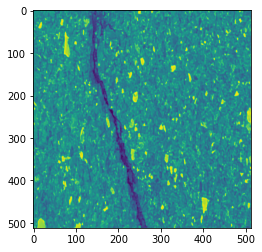

In [5]:
plt.imshow(images[500])

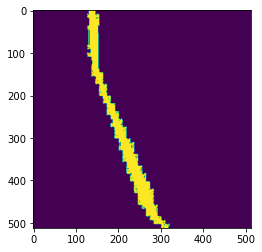

In [6]:
plt.imshow(masks[500])

In [7]:
len(images)

11298

In [8]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [9]:
#
#
R.setup_data(images, masks, dataset_size=6012, weights=weights)

Weights OK!


In [10]:
RUNS = 5

In [11]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')

***
RUN: 0
Epoch 1/100
5/5 [==============================] - 29s 4s/step - loss: 1.7412 - dice_coeff: 0.1027 - val_loss: 1.5772 - val_dice_coeff: 0.1184
Epoch 2/100
5/5 [==============================] - 7s 1s/step - loss: 1.5863 - dice_coeff: 0.1117 - val_loss: 1.5764 - val_dice_coeff: 0.1185
Epoch 3/100
5/5 [==============================] - 7s 1s/step - loss: 1.5542 - dice_coeff: 0.1175 - val_loss: 1.5754 - val_dice_coeff: 0.1183
Epoch 4/100
5/5 [==============================] - 7s 1s/step - loss: 1.4665 - dice_coeff: 0.1220 - val_loss: 1.5715 - val_dice_coeff: 0.1182
Epoch 5/100
5/5 [==============================] - 7s 1s/step - loss: 1.4342 - dice_coeff: 0.1263 - val_loss: 1.5644 - val_dice_coeff: 0.1181
Epoch 6/100
5/5 [==============================] - 7s 2s/step - loss: 1.4063 - dice_coeff: 0.1313 - val_loss: 1.5556 - val_dice_coeff: 0.1181
Epoch 7/100
5/5 [==============================] - 7s 1s/step - loss: 1.4054 - dice_coeff: 0.1330 - val_loss: 1.5481 - val_dice_coeff: 0

In [12]:
R.classifier_scores

[[1.2754331827163696, 0.1310216188430786],
 [1.262637734413147, 0.12823615968227386],
 [1.1466132402420044, 0.2057732492685318],
 [0.9913716912269592, 0.3268955647945404],
 [1.1609963178634644, 0.35489988327026367]]

In [13]:
R.discriminator_scores

[[0.015752799808979034, 0.9972222447395325],
 [0.017744507640600204, 0.9944444298744202],
 [12.737829208374023, 0.7388888597488403],
 [26.82617950439453, 0.6333333253860474],
 [72.12882232666016, 0.5166666507720947]]

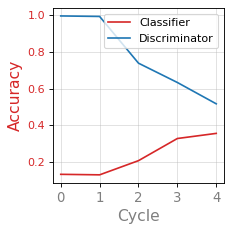

In [14]:
R.plot()